# Importing needed modules

In [8]:
import os
import requests
import torch

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from transformers import Owlv2Processor, Owlv2ForObjectDetection
from PIL import Image

# Function to visualize the final result of the model

In [9]:
def plot_results(results, texts, image):
    """
    Plots the results of object detection on an image.
    
    Args:
        results (list): List of dictionaries containing the detected object information.
        texts (list): List of text labels corresponding to the detected objects.
        image (PIL.JpegImagePlugin.JpegImageFile): The input image on which the objects are detected.
    """
    boxes, scores, labels = results[0]["boxes"], results[0]["scores"], results[0]["labels"]
    text = texts[0]
    colors = np.random.random((len(text),3))
    fig, ax = plt.subplots()
    ax.imshow(image)

    # Iteration on every boxes, scores and labels
    for box, score, label in zip(boxes, scores, labels):
        box = [round(i, 2) for i in box.detach().numpy()]
        
        # Convertion of the coordinates of the box for Matplotlib (x, y, width, length)
        x, y, xmax, ymax = box
        rect = patches.Rectangle((x, y), xmax - x, ymax - y, linewidth=1, edgecolor=colors[label], facecolor='none')
        
        ax.add_patch(rect)
        plt.text(x, y - 10, f'{text[label]}: {round(score.item(), 2)}', color='white', fontsize=8, backgroundcolor=colors[label])
        
        print(f"Detected {text[label]} with confidence {round(score.item(), 3)} at location {box}")
   
    plt.axis('off')
    plt.show()


# Loading the two needed models

In [10]:
processor = Owlv2Processor.from_pretrained("google/owlv2-base-patch16-ensemble")
model = Owlv2ForObjectDetection.from_pretrained("google/owlv2-base-patch16-ensemble")

# Prediction with the models

In [11]:
path = "./data/iLoveIMG IMG 6542.jpg"
image = Image.open(path)
texts = [["business men figure", "oldwomen figure","Bus figure"]]
inputs = processor(text=texts, images=image, return_tensors="pt")
outputs = model(**inputs)

# Target image sizes (height, width) to rescale box predictions [batch_size, 2]
target_sizes = torch.Tensor([image.size[::-1]])
# Convert outputs (bounding boxes and class logits) to Pascal VOC Format (xmin, ymin, xmax, ymax)
results = processor.post_process_object_detection(outputs=outputs, target_sizes=target_sizes, threshold=0.1)

# Ploting results

Detected business men figure with confidence 0.187 at location [849.56, 165.51, 1374.85, 1075.45]
Detected business men figure with confidence 0.179 at location [1586.78, 300.3, 2260.43, 1348.02]
Detected Bus figure with confidence 0.655 at location [1340.96, 431.41, 3667.4, 1173.34]
Detected Bus figure with confidence 0.124 at location [1349.89, 440.61, 3647.06, 1054.13]
Detected Bus figure with confidence 0.123 at location [2243.39, 446.49, 3646.02, 1043.54]
Detected business men figure with confidence 0.131 at location [780.04, 113.64, 1452.81, 1416.08]


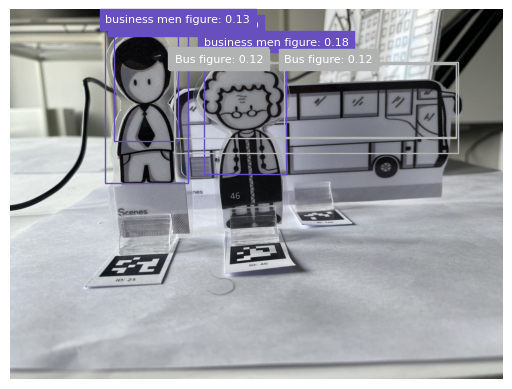

In [12]:
plot_results(results, texts, image)

# Load images

In [13]:
directory = "./data/images/"
files = os.listdir(directory)
images = []

for file in files:
    images.append(Image.open(directory + file))

images

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480>,
 <PIL.Jpeg